In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [4]:
city = "Sicklerville"
content = "tip"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           606 non-null    object
 1   business_id       606 non-null    object
 2   text              606 non-null    object
 3   date              606 non-null    object
 4   compliment_count  606 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 23.8+ KB


In [6]:
df.head()

,user_id,business_id,text,date,compliment_count
0,9C_h-H1Z7Xz7dvbgsBrnSg,wuoYvojFNWuRrUO2UyM47Q,Slowest gas attendants ever,2011-08-07 23:43:48,0
1,4StF33ZASP-kBp62BK-KuA,lQZDL1J6xDjL7PG-5CgkGA,Greatest sushi and great variety of Ssian dish...,2018-03-25 00:48:55,0
2,yX7A-nIPx43J4bzgVHrx1A,oGDLaTRLPLz-R_KyQ3TzPA,Always 5 stars. Authentic and delicious every...,2015-09-04 23:19:15,0
3,rSGYUBxKa-yA_0-5UbqRfQ,n1HOCV74TBVZdQdOUgp9xA,Awesome food! Love Moe Monday's! Great food an...,2015-06-06 22:37:07,0
4,d8FwfuFM9SJA3kU_cIQ3aw,lQZDL1J6xDjL7PG-5CgkGA,Chinese pizza!,2015-06-06 21:14:01,0


In [7]:
df.duplicated().sum()

0

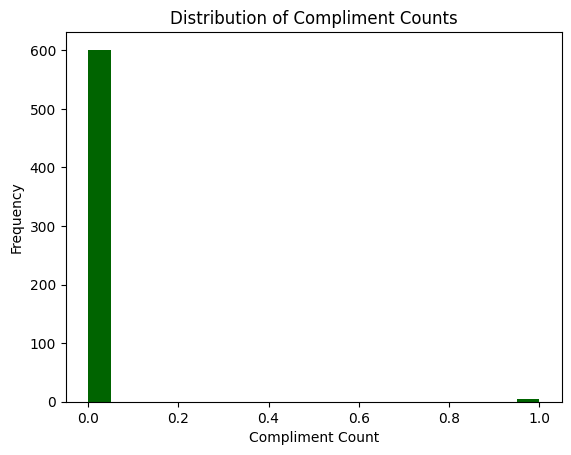

In [9]:
plt.hist(df['compliment_count'], bins=20, color='darkgreen')
plt.title('Distribution of Compliment Counts')
plt.xlabel('Compliment Count')
plt.ylabel('Frequency')
plt.show()

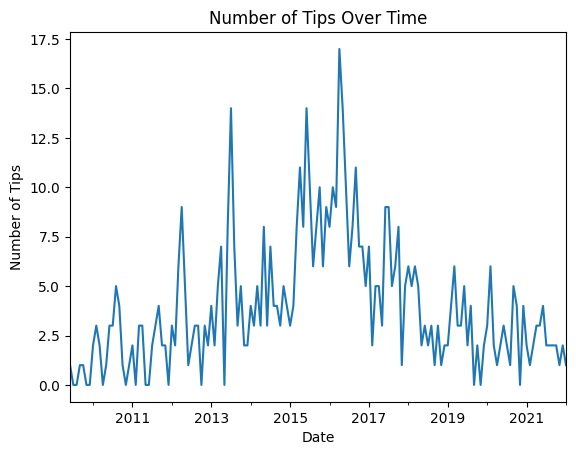

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.resample('ME').size().plot()
plt.title('Number of Tips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tips')
plt.show()